Lucky Singh (202401100300146)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [12]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])


In [13]:
np.random.seed(42)

input_size = 2
hidden_size = 3
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

lr = 0.1
epochs = 5000
loss_list = []

In [14]:
for epoch in range(epochs):

    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    loss = np.mean((y - y_hat)**2)
    loss_list.append(loss)

    d_output = (y_hat - y) * sigmoid_derivative(y_hat)

    dW2 = a1.T @ d_output
    db2 = np.sum(d_output, axis=0, keepdims=True)

    d_hidden = d_output @ W2.T * sigmoid_derivative(a1)

    dW1 = X.T @ d_hidden
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    W1 -= lr*dW1
    b1 -= lr*db1
    W2 -= lr*dW2
    b2 -= lr*db2


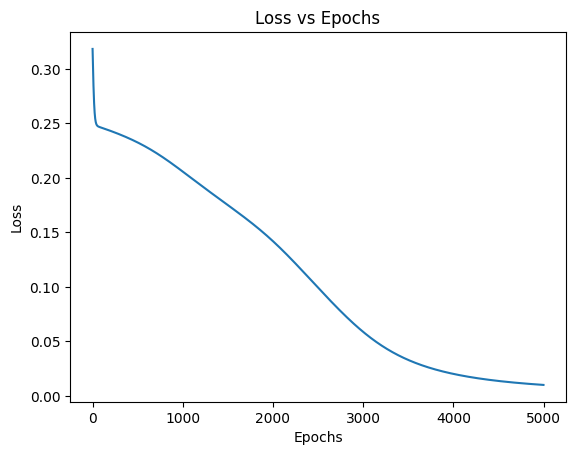

In [15]:
plt.plot(loss_list)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [16]:
print("Testing model:")
test_input = np.array([[1,0]])
z1 = test_input @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2
pred = sigmoid(z2)

print("Input:", test_input)
print("Predicted output:", pred)

Testing model:
Input: [[1 0]]
Predicted output: [[0.89666017]]
